<a href="https://colab.research.google.com/github/deepakkumargour/thinktech/blob/master/COVID_19_Predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab 
df = pd.read_csv('time-series-19-covid-combined.csv') 
df.head(150)

Saving time-series-19-covid-combined.csv to time-series-19-covid-combined (1).csv


,Date,Country/Region,Province/State,Lat,Long,Confirmed,Deaths
0,2020-01-22,Afghanistan,NaN,33.0000,65.0000,0,0
1,2020-01-23,Afghanistan,NaN,33.0000,65.0000,0,0
2,2020-01-24,Afghanistan,NaN,33.0000,65.0000,0,0
3,2020-01-25,Afghanistan,NaN,33.0000,65.0000,0,0
4,2020-01-26,Afghanistan,NaN,33.0000,65.0000,0,0
...,...,...,...,...,...,...,...
145,2020-02-06,Algeria,NaN,28.0339,1.6596,0,0
146,2020-02-07,Algeria,NaN,28.0339,1.6596,0,0
147,2020-02-08,Algeria,NaN,28.0339,1.6596,0,0
148,2020-02-09,Algeria,NaN,28.0339,1.6596,0,0


In [ ]:
df.shape

(16120, 7)

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Date                  0
Country/Region        0
Province/State    11180
Lat                   0
Long                  0
Confirmed             0
Deaths                0
dtype: int64

In [ ]:
#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed
df = df.dropna(axis=1)

In [ ]:
#Get the new count of the number of rows and cols
df.shape

(16120, 6)

In [ ]:
#Get a count of the number of 'M' & 'B' cells
df['Deaths'].value_counts()

0       13386
1         913
2         403
3         283
6         215
        ...  
699         1
2682        1
611         1
307         1
6077        1
Name: Deaths, Length: 231, dtype: int64

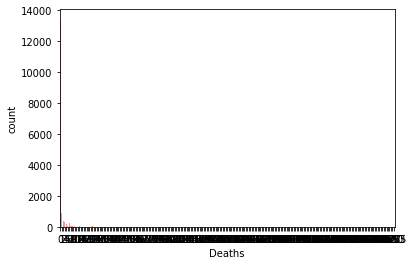

In [ ]:
#Visualize this count 
sns.countplot(df['Deaths'],label="Count")

In [ ]:
#Look at the data types 
df.dtypes

Date               object
Country/Region     object
Lat               float64
Long              float64
Confirmed           int64
Deaths              int64
dtype: object

In [ ]:
#Encoding categorical data values (
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[ 0  0  0 ... 88 88 88]


In [ ]:
df.head(150)

,Date,Country/Region,Lat,Long,Confirmed,Deaths
0,2020-01-22,0,33.0000,65.0000,0,0
1,2020-01-23,0,33.0000,65.0000,0,0
2,2020-01-24,0,33.0000,65.0000,0,0
3,2020-01-25,0,33.0000,65.0000,0,0
4,2020-01-26,0,33.0000,65.0000,0,0
...,...,...,...,...,...,...
145,2020-02-06,2,28.0339,1.6596,0,0
146,2020-02-07,2,28.0339,1.6596,0,0
147,2020-02-08,2,28.0339,1.6596,0,0
148,2020-02-09,2,28.0339,1.6596,0,0


In [ ]:
#Get the correlation of the columns
df.corr()

,Country/Region,Lat,Long,Confirmed,Deaths
Country/Region,1.000000,0.004283,-0.107132,-0.025899,-0.016236
Lat,0.004283,1.000000,-0.147383,0.054773,0.042066
Long,-0.107132,-0.147383,1.000000,0.061036,0.040562
Confirmed,-0.025899,0.054773,0.061036,1.000000,0.898535
Deaths,-0.016236,0.042066,0.040562,0.898535,1.000000


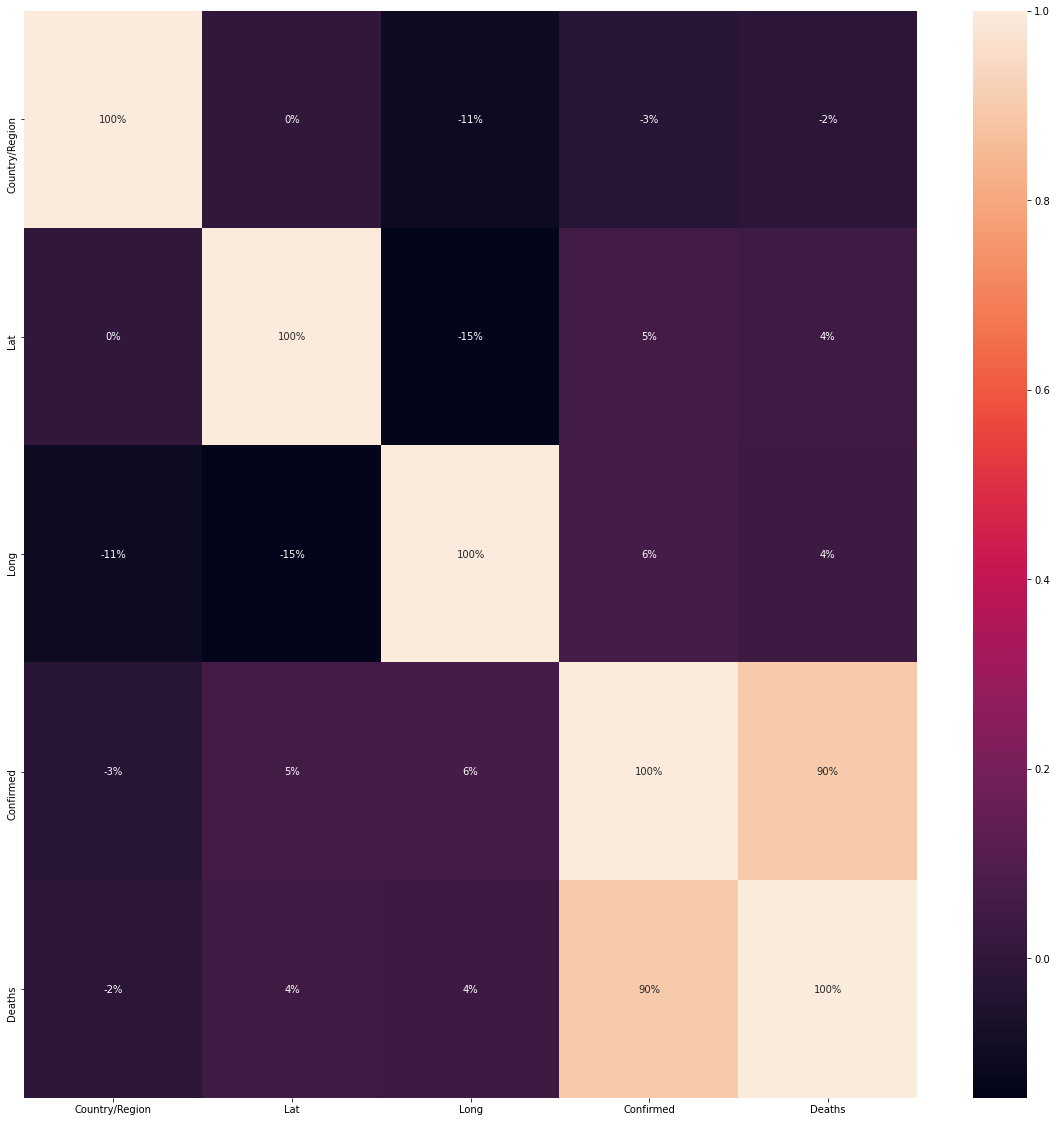

In [ ]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
X = df.iloc[:, 2:31].values 
Y = df.iloc[:, 1].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def models(X_train,Y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model = models(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic Regression Training Accuracy: 0.3540942928039702
[1]K Nearest Neighbor Training Accuracy: 0.9876757650951199
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.49644334160463194
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.5045492142266336
[4]Gaussian Naive Bayes Training Accuracy: 0.8885028949545078
[5]Decision Tree Classifier Training Accuracy: 0.9919768403639372
[6]Random Forest Classifier Training Accuracy: 0.9918114143920596


In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model[0] Testing Accuracy = "nan!"

[[17  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 13]]
Model[1] Testing Accuracy = "1.0!"



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


[[ 0  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 13]]
Model[2] Testing Accuracy = "1.0!"

[[ 0  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 22]
 [ 0  0  0 ...  0  0 13]]
Model[3] Testing Accuracy = "1.0!"

[[17  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 13]]
Model[4] Testing Accuracy = "1.0!"

[[17  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 13]]
Model[5] Testing Accuracy = "1.0!"

[[17  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 13]]
Model[6] Testing Accuracy = "1.0!"



In [ ]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        15
           6       0.27      1.00      0.43        14
           7       0.00      0.00      0.00        17
           8       0.58      1.00      0.73       119
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        19
          17      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00       119
           9       0.88      0.83      0.86        18
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        14
          14       0.75      0.19      0.30        16
          15       1.00      1.00      1.00        13
          16       0.76      0.84      0.80        19
          17       0.54    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.11      1.00      0.20        12
           2       1.00      1.00      1.00        22
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        15
           6       1.00      1.00      1.00        14
           7       0.00      0.00      0.00        17
           8       1.00      0.90      0.95       119
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        24
          13       1.00      0.93      0.96        14
          14       0.00      0.00      0.00        16
          15       1.00      1.00      1.00        13
          16       0.00      0.00      0.00        19
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.29      1.00      0.44        12
           2       1.00      1.00      1.00        22
           3       0.00      0.00      0.00        18
           4       1.00      1.00      1.00        17
           5       0.00      0.00      0.00        15
           6       0.44      1.00      0.61        14
           7       0.00      0.00      0.00        17
           8       0.90      1.00      0.95       119
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        16
          15       0.45      1.00      0.62        13
          16       0.00      0.00      0.00        19
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9900744416873449



In [ ]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[ 97  86  36 ... 106  17  93]

[ 97  86  35 ... 106  17  93]


From the accuracy and metrics above, the model that performed the best on the test data was the Decision Tree Classifier  with an accuracy score of about 99.18%.this model detect mortality durig covid-19 in patients. Make the prediction/classification on the test data and show both the Decision Tree Classifier model classification/prediction and the actual values of the patient that shows rather or not they have COVID-19 mortality possibility.
I notice the model, misdiagnosed a few patients as having COVID-19 when they didn’t and it misdiagnosed patients that did have symptoms as not having COVID-19. Although this model is good, when dealing with the lives of others I want this model to be better and get it’s accuracy as close to 100% as possible or at least as good as if not better than doctors. So a little more tuning of each of the models is necessary.